<a href="https://colab.research.google.com/github/JaeKwonLim/SDoT_ParticulateMatter/blob/main/3.sdot_%EC%8B%9C%EB%A6%AC%EC%96%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from google.colab import drive

drive.mount("/content/drive")
pd.options.display.max_columns = 999

Mounted at /content/drive


In [ ]:
#sample_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/drop_sample/drop_sample_sdot_all')
#data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/data/sdot_data', index_col = 0)
#data_drop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/data/sdot_dropna', index_col=0)
data_date = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/S_DoT/data/sdot_date', index_col=0)
location = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/학부연구생/미세먼지_취약계층/data/location/colab_(공개용)도시데이터센서(S-DoT) 환경정보 설치 위치정보_211206.csv')

In [ ]:
data_date

,시리얼,초미세먼지(㎍/㎥),미세먼지(㎍/㎥),기온(℃),상대습도( %),초미세먼지 보정(㎍/㎥),미세먼지 보정(㎍/㎥),등록일자
0,V02Q1940043,7.0,12.0,-1.4,32.0,11.0,21.0,2021-01-04
1,V02Q1940046,4.0,9.0,-1.8,38.0,6.0,15.0,2021-01-04
2,V02Q1940044,5.0,7.0,-1.5,33.0,10.0,10.0,2021-01-04
3,V02Q1940049,8.0,15.0,-1.7,33.0,11.0,19.0,2021-01-04
4,V02Q1940050,8.0,13.0,-2.6,36.0,12.0,22.0,2021-01-04
...,...,...,...,...,...,...,...,...
11223507,V02Q1941006,1.0,2.0,13.1,87.0,2.0,3.0,2022-03-13
11223508,V02Q1940950,6.0,6.0,14.0,80.0,6.0,9.0,2022-03-13
11223509,V02Q1941013,12.0,12.0,13.9,85.0,13.0,15.0,2022-03-13
11223510,V02Q1940944,8.0,8.0,14.0,81.0,8.0,11.0,2022-03-13


#결측값 버리기

In [ ]:
data.isnull().sum()

NameError: ignored

In [ ]:
data.dropna(inplace = True)
data.isnull().sum()

In [ ]:
data.shape

#기온 데이터 수정

In [ ]:
data_drop['tem'] = data_drop['기온(℃)'].str.split('0-').str[1] # 0-을 기준으로 오른쪽 값들만 tem 컬럼에 추가
data_drop['tem'] = '-' + data_drop['tem'] # tem 컬럼에 - 추가
data_drop['tem'] = data_drop['tem'].fillna(data_drop['기온(℃)']) # tem 컬럼의 null값을 기온 값 데이터로 바꿈

data_tem = data_drop.drop(columns = ['기온(℃)']) # 기존 기온 컬럼 삭제
data_tem=data_tem[['시리얼', '초미세먼지(㎍/㎥)', '미세먼지(㎍/㎥)', 'tem', '상대습도( %)', '초미세먼지 보정(㎍/㎥)',
       '미세먼지 보정(㎍/㎥)', '등록일자']]

data_tem.rename(columns = {'tem':'기온(℃)'},inplace=True) #tem을 기온 칼럼으로 이름 수정

In [ ]:
data_tem

# 문자열을 숫자형으로 변경

In [ ]:
data_tem.info()

In [ ]:
data_tem['초미세먼지(㎍/㎥)'] = pd.to_numeric(data_tem['초미세먼지(㎍/㎥)'], errors = 'coerce')
data_tem['미세먼지(㎍/㎥)'] = pd.to_numeric(data_tem['미세먼지(㎍/㎥)'], errors = 'coerce')
data_tem['기온(℃)'] = pd.to_numeric(data_tem['기온(℃)'], errors = 'coerce')
data_tem['상대습도( %)'] = pd.to_numeric(data_tem['상대습도( %)'], errors = 'coerce')
data_tem['초미세먼지 보정(㎍/㎥)'] = pd.to_numeric(data_tem['초미세먼지 보정(㎍/㎥)'], errors = 'coerce')
data_tem['미세먼지 보정(㎍/㎥)'] = pd.to_numeric(data_tem['미세먼지 보정(㎍/㎥)'], errors = 'coerce')

In [ ]:
data_tem.info()

# 등록일자를 문자열에서 datetime으로 변경

In [ ]:
data_tem['등록일자'] = data_tem['등록일자'].str[:10] # 앞 열자리만 추출(시간값을 버림)
data_tem['등록일자'] = pd.to_datetime(data_tem['등록일자'],errors = 'coerce', format='%Y-%m-%d') # 년월일로 datetime 설정

In [ ]:
data_tem.info()

In [ ]:
data_tem.isnull().sum()

In [ ]:
data_tem.dropna(inplace = True)
data_tem.isnull().sum()

# irq 적용

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


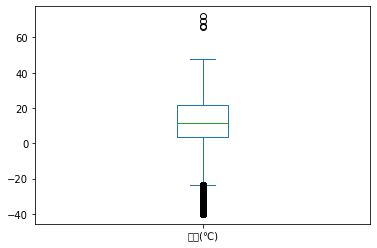

In [ ]:
data_date.plot(kind = 'box', y = '기온(℃)')

In [ ]:
tem1 = data_date['기온(℃)'].quantile(0.25) 
tem3 = data_date['기온(℃)'].quantile(0.75) 
iqr_tem = tem3- tem1 

condition_tem = (data_date['기온(℃)'] < tem1 - 1.5 * iqr_tem) | (data_date['기온(℃)'] > tem3 + 1.5 * iqr_tem) 
data_date[condition_tem].index

data_date.drop(data_date[condition_tem].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)


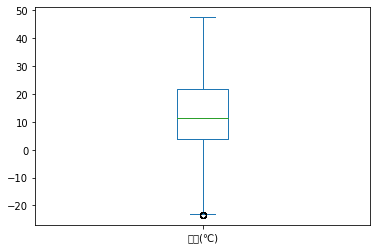

In [ ]:
data_date.plot(kind = 'box', y = '기온(℃)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_

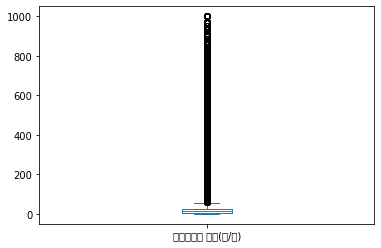

In [ ]:
data_date.plot(kind = 'box', y = '초미세먼지 보정(㎍/㎥)')

In [ ]:
s_pm1 = data_date['초미세먼지 보정(㎍/㎥)'].quantile(0.25) 
s_pm3 = data_date['초미세먼지 보정(㎍/㎥)'].quantile(0.75) 
iqr_s_pm = s_pm3- s_pm1 

condition_s_pm = (data_date['초미세먼지 보정(㎍/㎥)'] < s_pm1 - 1.5 * iqr_s_pm) | (data_date['초미세먼지 보정(㎍/㎥)'] > s_pm3 + 1.5 * iqr_s_pm) 
data_date[condition_s_pm].index

data_date.drop(data_date[condition_s_pm].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_

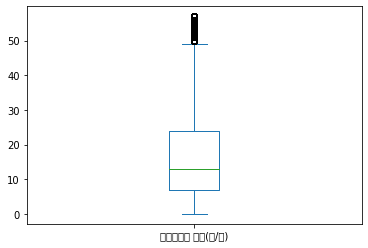

In [ ]:
data_date.plot(kind = 'box', y = '초미세먼지 보정(㎍/㎥)') # 초미세를 기준으로한 iqr 적용

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

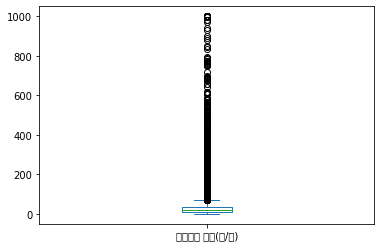

In [ ]:
data_date.plot(kind = 'box', y = '미세먼지 보정(㎍/㎥)')

In [ ]:
b_pm1 = data_date['미세먼지 보정(㎍/㎥)'].quantile(0.25) 
b_pm3 = data_date['미세먼지 보정(㎍/㎥)'].quantile(0.75) 
iqr_b_pm = b_pm3- b_pm1 

condition_b_pm = (data_date['미세먼지 보정(㎍/㎥)'] < b_pm1 - 1.5 * iqr_b_pm) | (data_date['미세먼지 보정(㎍/㎥)'] > b_pm3 + 1.5 * iqr_b_pm) 
data_date[condition_b_pm].index

data_date.drop(data_date[condition_b_pm].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48372 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

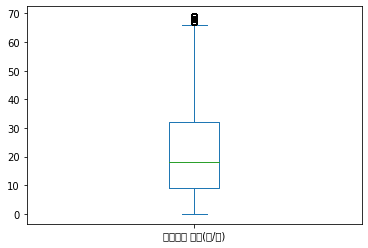

In [ ]:
data_date.plot(kind = 'box', y = '미세먼지 보정(㎍/㎥)')

In [ ]:
data_date.shape

(10306754, 8)

# sdot + location, group by

In [ ]:
df = pd.merge(data_date, location, on = '시리얼', how = 'left')

In [ ]:
df.dropna(subset = ['자치구'], inplace = True) # 자치구에 있는 결측값을 삭제
df = df.drop(columns = ['주소', '높이', '위도', '경도']) # 필요 없는 열을 삭제

In [ ]:
def analysis(x): # 각 칼럼별 분석과 dict 구성
    a = {}
    a['PM 2.5 mean'] = x['초미세먼지 보정(㎍/㎥)'].mean()
    a['PM 2.5 max'] = x['초미세먼지 보정(㎍/㎥)'].max()
    a['PM 2.5 min'] = x['초미세먼지 보정(㎍/㎥)'].min()

    a['PM 10 mean'] = x['미세먼지 보정(㎍/㎥)'].mean()
    a['PM 10 max'] = x['미세먼지 보정(㎍/㎥)'].max()
    a['PM 10 min'] = x['미세먼지 보정(㎍/㎥)'].min()

    a['Relative humidity mean'] = x['상대습도( %)'].mean()
    a['Relative humidity max'] = x['상대습도( %)'].max()
    a['Relative humidity min'] = x['상대습도( %)'].min()

    a['temperature mean'] = x['기온(℃)'].mean()
    a['temperature max'] = x['기온(℃)'].max()
    a['temperature min'] = x['기온(℃)'].min()

    return pd.Series(a, index=['PM 2.5 mean', 'PM 2.5 max', 'PM 2.5 min',
                               'PM 10 mean', 'PM 10 max','PM 10 min',
                               'Relative humidity mean', 'Relative humidity max', 'Relative humidity min',
                               'temperature mean', 'temperature max', 'temperature min'])

In [ ]:
df_group = df.groupby('시리얼').apply(analysis) # 날짜와 자치구를 인덱스로 group by

In [ ]:
pd.options.display.max_rows = 100
df_group.head(100)

,PM 2.5 mean,PM 2.5 max,PM 2.5 min,PM 10 mean,PM 10 max,PM 10 min,Relative humidity mean,Relative humidity max,Relative humidity min,temperature mean,temperature max,temperature min
시리얼,,,,,,,,,,,,
OC3CL200010,12.300250,49.0,0.0,21.567832,69.0,0.0,66.150437,100.0,15.0,14.534852,36.1,-18.9
OC3CL200011,11.944401,57.0,0.0,20.077326,69.0,0.0,87.404680,88.0,85.0,21.600000,21.6,21.6
OC3CL200012,15.842224,53.0,0.0,26.132498,69.0,0.0,57.503320,100.0,10.0,12.594205,39.3,-17.0
OC3CL200013,13.184704,50.0,0.0,21.564554,69.0,0.0,64.331627,100.0,10.0,11.319545,44.4,-18.6
OC3CL200014,13.976402,51.0,0.0,23.107236,69.0,0.0,60.135324,100.0,13.0,12.033758,36.5,-16.9
OC3CL200015,13.342584,52.0,0.0,23.411634,69.0,0.0,57.135213,100.0,11.0,16.620626,39.2,-17.7
OC3CL200016,13.967845,52.0,0.0,22.745347,69.0,0.0,59.942308,100.0,10.0,12.383488,37.2,-16.6
OC3CL200017,12.367289,51.0,0.0,19.804833,69.0,0.0,64.592434,100.0,11.0,11.436035,37.9,-17.5
OC3CL200018,14.340047,51.0,0.0,25.248615,69.0,0.0,60.438299,100.0,11.0,12.195151,40.0,-17.0


In [ ]:
df_group.shape

(1099, 12)

In [ ]:
df_group.to_csv('Sdot_Serial.csv')